![Clothing Classifier Model](images/Clothing%20Classifier%20Model.png)

_Fashion Forward_ is a new AI-based e-commerce clothing retailer. They want to use image classification to automatically categorize new product listings, making it easier for customers to find what they're looking for. It will also assist in inventory management by quickly sorting items.

As a data scientist tasked with implementing a clothing classifier, your primary objective is to develop a deep learning model capable of accurately categorizing images of clothing items into distinct garment types such as shirts, trousers, shoes, etc.

In [83]:
# Run the cells below first
from tensorflow.keras import layers, models, Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load the MNIST datasets as NumPy arrays
train_images, train_labels, test_images, test_labels = (np.load('data/fashion_mnist.npz')[key] 
                                    for key in ['train_images', 'train_labels', 'test_images', 'test_labels'])

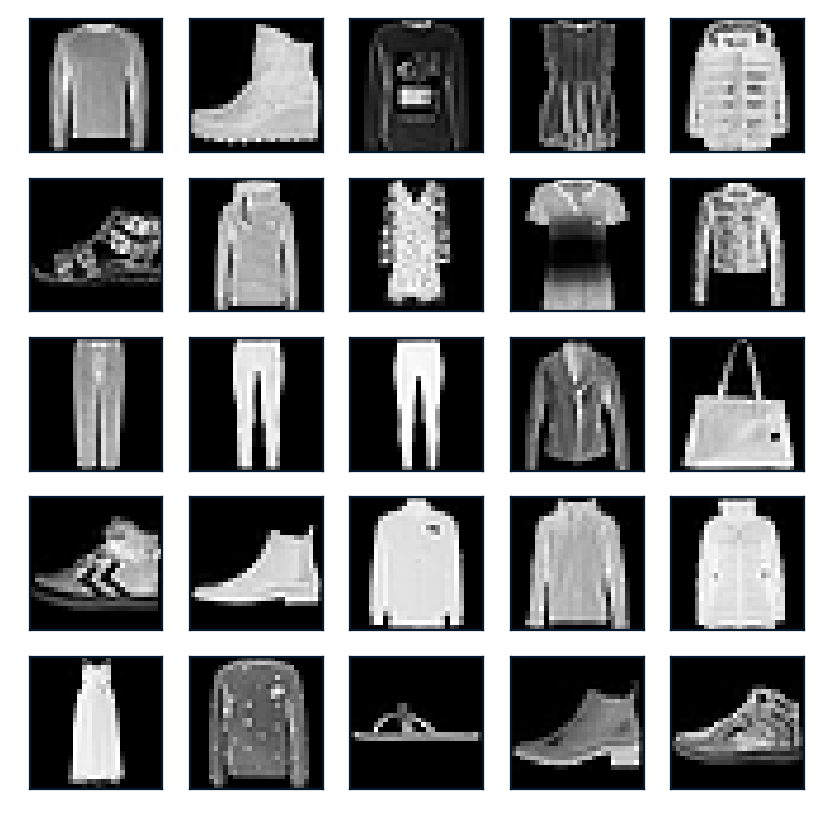

In [84]:
# Visualize a sample of images
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]/255.0, cmap='gray')
plt.show()

In [85]:
# Start coding here
# Use as many cells as you need

In [86]:
train_labels = to_categorical(train_labels, num_classes=len(np.unique(train_labels)))

In [87]:
train_images.shape

(30000, 28, 28)

In [88]:
train_labels.shape

(30000, 10)

In [89]:
# Instantiate the Sequential model
model = Sequential()

In [90]:
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1), strides=1))

In [91]:
model.add(Conv2D(16, kernel_size=3, activation='relu', strides=1))

In [92]:
model.add(Flatten())

In [93]:
model.add(Dense(10, activation='softmax'))

In [94]:
model.compile(optimizer='adam', loss ='categorical_crossentropy', metrics=['accuracy'])

In [95]:
model.fit(train_images, train_labels, epochs=1)

938/938 [==============================] - 37s 38ms/step - loss: 0.8377 - accuracy: 0.8071


In [96]:
test_labels = to_categorical(test_labels, num_classes=len(np.unique(test_labels)))

In [97]:
test_accuracy = model.evaluate(test_images, test_labels)[1]
print(test_accuracy)

157/157 [==============================] - 1s 7ms/step - loss: 0.4546 - accuracy: 0.8470
0.847000002861023
